In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
X, y = load_iris(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [8]:
class EditedNearestNeighbors:
    def __init__(self, k_neighbors=3):
        self.k_neighbors = k_neighbors

    def fit_resample(self, X, y):
        class_counts = Counter(y)
        min_class_size = min(class_counts.values())
        classes = np.unique(y)
        
        X_resampled = []
        y_resampled = []

        for class_label in classes:
            X_class = X[y == class_label]
            
            knn = KNeighborsClassifier(n_neighbors=self.k_neighbors)
            knn.fit(X, y)
            
            neighbors = knn.kneighbors(X_class, return_distance=False)
            to_remove = []
            for i, idx in enumerate(neighbors):
                neighbor_labels = y[idx]
                if np.sum(neighbor_labels == class_label) <= (self.k_neighbors // 2):
                    to_remove.append(i)

            X_cleaned = np.delete(X_class, to_remove, axis=0)
            
            if X_cleaned.shape[0] > min_class_size:
                idx_to_keep = np.random.choice(X_cleaned.shape[0], min_class_size, replace=False)
                X_cleaned = X_cleaned[idx_to_keep]

            X_resampled.append(X_cleaned)
            y_resampled.append(np.full(X_cleaned.shape[0], class_label))

        X_resampled = np.vstack(X_resampled)
        y_resampled = np.hstack(y_resampled)

        return X_resampled, y_resampled

In [9]:
enn = EditedNearestNeighbors(k_neighbors=3)
X_train_resampled, y_train_resampled = enn.fit_resample(X_train, y_train)

In [10]:
print("y_train:", Counter(y_train))
print("y_train_resampled:", Counter(y_train_resampled))

y_train: Counter({2: 44, 0: 42, 1: 41})
y_train_resampled: Counter({0: 41, 2: 41, 1: 38})


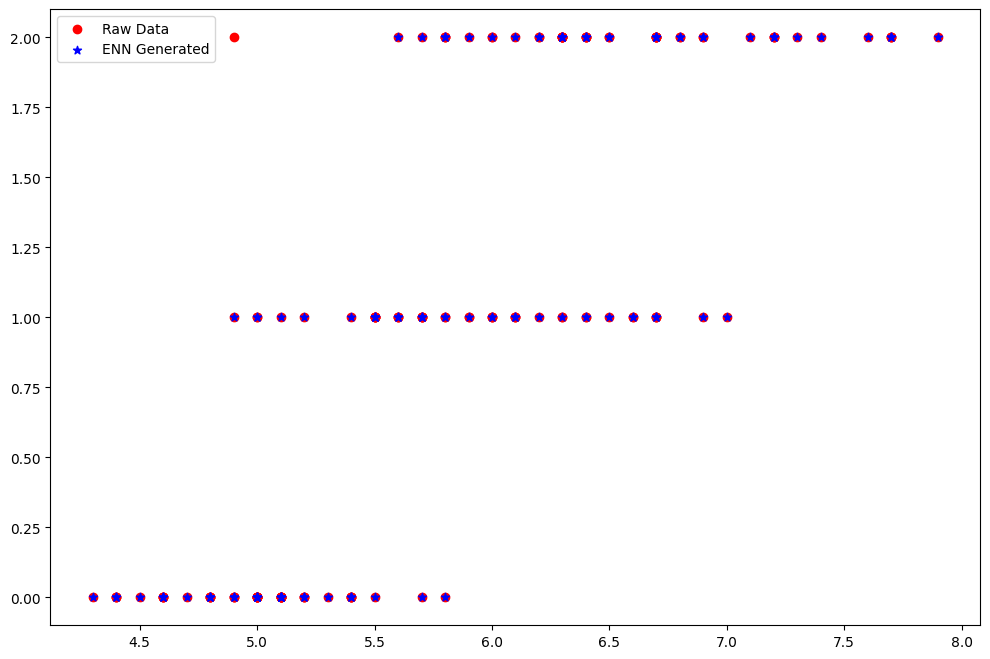

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], y_train, color="r", marker="o")
plt.scatter(X_train_resampled[:, 0], y_train_resampled, color="b", marker="*")
plt.legend(["Raw Data", "ENN Generated"])
plt.show()